# Review 
As I know what type of task will be on competition, I'll try to do similar problem with 
[job_salary_prediction_dataset](https://www.kaggle.com/competitions/job-salary-prediction/)

# First data understanding and cleaning

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Train

In [2]:
train_df = pd.read_csv('data/Train_rev1.csv')

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


In [4]:
train_df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [8]:
train_df['FullDescription'].duplicated().sum()

2630

In [11]:
train_df_small = train_df.sample(n = int(train_df.shape[0]*0.1))

In [18]:
train_df_small.head(3)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
95834,69221187,School Administrator,ITN Mark Education would like to welcome a CMI...,BIRMINGHAM,Birmingham,full_time,permanent,ITN Mark Education Birmingham,Teaching Jobs,From 225 to 365 per week,14160,fish4.co.uk
116028,69776885,Lead C I Engineer Helensburgh,"Mott MacDonald is a global management, enginee...","Glasgow, Central Scotland",UK,NaN,permanent,"Mott MacDonald Oil, Gas Petrochemicals",Engineering Jobs,28000 - 45000/annum,36500,cv-library.co.uk
142481,70602651,Optical Assistant,"The Company: An independent, family owned opti...","Lancashire, England, Lancashire",Lancashire,NaN,NaN,Healthline Optical Recruitment,Healthcare & Nursing Jobs,12000 - 13000 per annum + holidays<,12500,jobs.opticianonline.net


In [13]:
X_train, y_train = train_df_small['FullDescription'], train_df_small['SalaryNormalized']

In [17]:
X_train.iloc[0], y_train.iloc[0]

('ITN Mark Education would like to welcome a CMIS Administrator to apply for this vacancy in the Saltley area of Birmingham. This school was Deemed ?Good? in its last Ofsted. The headteacher is a leader of great vision and energy who has led the school very successfully in the huge improvement it has made in the last two years. She is strongly supported by a leadership team which shares the head teacher?s very high expectations and together they provide excellent leadership and management. The school provides exceptional care and support for all pupils and families and is an integral part of the local community. Nearly all pupils including those with special educational needs, make good progress, so that most reach the standards expected in English and Mathematics by the end of year **** Pupils behave well in lessons and around the school. Successful Administrators will hold the following essential attributes:  An excellent working knowledge of CMIS systems  A working knowledge of HL P

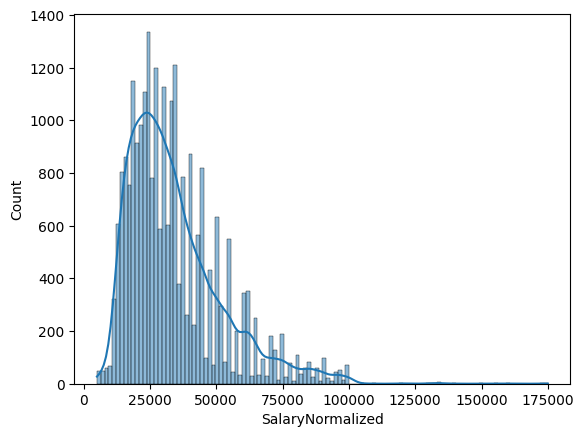

In [31]:
ax = sns.histplot(y_train, kde=True)

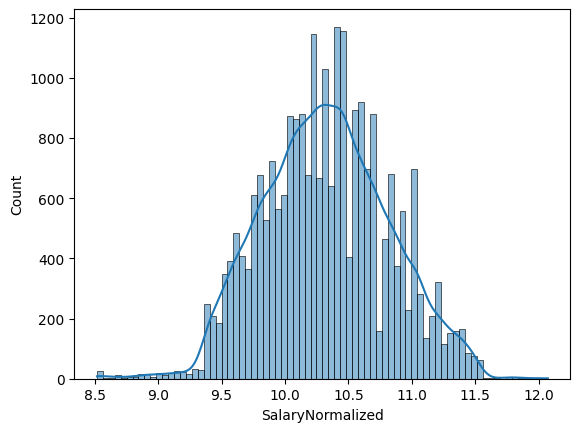

In [32]:
ax = sns.histplot(np.log(y_train), kde=True)

In [33]:
val_df = pd.read_csv('data/Valid_rev1.csv')

In [34]:
val_df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SourceName
0,13656201,"Lead Technical Architect, C Banking",Lead Technical Architect required for a Tier *...,London,London,NaN,permanent,Scope AT Limited,IT Jobs,jobserve.com
1,14663195,RECRUITMENT CONSULTANT INDUSTRIAL / COMMERCIA...,THIS IS A LIVE VACANCY NOT A GENERIC ADVERTISE...,"LEEDS, West Yorkshire",Leeds,NaN,permanent,Code Blue Recruitment,HR & Recruitment Jobs,cv-library.co.uk
2,16530664,Mechanical / Chemical / Process Engineer Cool...,Mechanical / Chemical / Process Engineer Cool...,"Hampshire, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,cv-library.co.uk
3,19047458,Trainee Mortgage Advisor West Midlands,"Are you a successful, results driven person? A...",West Midlands,West Midlands,NaN,permanent,Brite Recruitment,Accounting & Finance Jobs,cv-library.co.uk
4,20881907,Mortgage Services Consultant East Midlands,"Are you a successful, results driven person? D...",East Midlands,East Midlands,NaN,permanent,Brite Recruitment,Accounting & Finance Jobs,cv-library.co.uk
